In [46]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import precision_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [11]:
data = pd.read_csv('creditcardmarketing_post_cleaning.csv')

In [12]:
data.head()

,Unnamed: 0,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,0,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,1,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,2,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,3,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,4,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [13]:
data = data.drop(columns=['Unnamed: 0'])

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17976 entries, 0 to 17975
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   offer_accepted        17976 non-null  object 
 1   reward                17976 non-null  object 
 2   mailer_type           17976 non-null  object 
 3   income_level          17976 non-null  object 
 4   bank_accounts_open    17976 non-null  int64  
 5   overdraft_protection  17976 non-null  object 
 6   credit_rating         17976 non-null  object 
 7   credit_cards_held     17976 non-null  int64  
 8   homes_owned           17976 non-null  int64  
 9   household_size        17976 non-null  int64  
 10  own_your_home         17976 non-null  object 
 11  average_balance       17976 non-null  float64
 12  q1_balance            17976 non-null  float64
 13  q2_balance            17976 non-null  float64
 14  q3_balance            17976 non-null  float64
 15  q4_balance         

In [22]:
X = data.select_dtypes(include = np.number)

In [24]:
X.head()

,bank_accounts_open,credit_cards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,2,1,4,1160.75,1669.0,877.0,1095.0,1002.0
1,1,2,2,5,147.25,39.0,106.0,78.0,366.0
2,2,2,1,2,276.50,367.0,352.0,145.0,242.0
3,2,1,1,4,1219.00,1578.0,1760.0,1119.0,419.0
4,1,2,1,6,1211.00,2140.0,1357.0,982.0,365.0


In [23]:
# Normalizing data
transformer = Normalizer().fit(X)
x_normalized = transformer.transform(X)
x = pd.DataFrame(x_normalized)

In [25]:
x.head()

,0,1,2,3,4,5,6,7,8
0,0.000375,0.000750,0.000375,0.001501,0.435466,0.626141,0.329015,0.410799,0.375909
1,0.002394,0.004788,0.004788,0.011969,0.352485,0.093358,0.253741,0.186715,0.876126
2,0.003106,0.003106,0.001553,0.003106,0.429394,0.569937,0.546642,0.225179,0.375817
3,0.000686,0.000343,0.000343,0.001372,0.418079,0.541205,0.603626,0.383782,0.143704
4,0.000334,0.000667,0.000334,0.002002,0.404000,0.713922,0.452707,0.327604,0.121767


In [27]:
cat = data.select_dtypes(include = object)
cat = cat.drop(['offer_accepted'], axis=1)
categorical = pd.get_dummies(cat, columns=['reward', 'mailer_type','income_level', 'overdraft_protection', 'credit_rating', 'own_your_home'])

In [30]:
categorical.head()

,reward_Air Miles,reward_Cash Back,reward_Points,mailer_type_Letter,mailer_type_Postcard,income_level_High,income_level_Low,income_level_Medium,overdraft_protection_No,overdraft_protection_Yes,credit_rating_High,credit_rating_Low,credit_rating_Medium,own_your_home_No,own_your_home_Yes
0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0
1,1,0,0,1,0,0,0,1,1,0,0,0,1,0,1
2,1,0,0,0,1,1,0,0,1,0,0,0,1,0,1
3,1,0,0,1,0,0,0,1,1,0,1,0,0,1,0
4,1,0,0,1,0,0,0,1,1,0,0,0,1,0,1


In [31]:
y = data['offer_accepted']
X = np.concatenate((x, categorical), axis=1)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [33]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_train, y_train)

In [34]:
redictions = classification.predict(X_test)
classification.score(X_test, y_test)

0.9436795994993742

In [35]:
y_test.value_counts()

No     6786
Yes     405
Name: offer_accepted, dtype: int64

In [37]:
confusion_matrix(y_test, redictions)

array([[6786,    0],
       [ 405,    0]])

In [38]:
classification.predict_proba(X_test)

array([[0.98974413, 0.01025587],
       [0.98388462, 0.01611538],
       [0.99100885, 0.00899115],
       ...,
       [0.99123132, 0.00876868],
       [0.98488289, 0.01511711],
       [0.94033654, 0.05966346]])

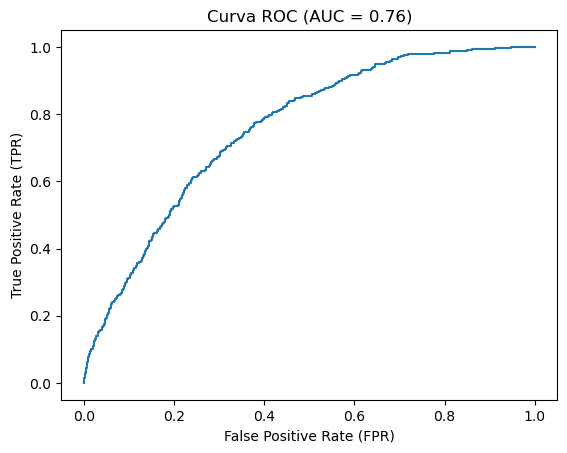

In [44]:
y_test_binary = y_test.replace({'No': 0, 'Yes': 1})
y_pred_proba = classification.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_binary,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Curva ROC (AUC = {:.2f})'.format(auc))
plt.show()

the precision for this model is 0 as it doesnt classify correctly any sample as positive
- PRECISION = TP/(TP+FN)
- ACCURACY = TP+TN/(TP+TN+FP+FN)
ACCURACY IS GOOD BUT THE PRECISION IS NOT

## DOWNSIZE IMBALANCE

In [49]:
data["offer_accepted"].value_counts()

No     16955
Yes     1021
Name: offer_accepted, dtype: int64

In [ ]:
yes=churnData[churnData['Churn']=="Yes"]
no=churnData[churnData["Churn"]=="No"]
no=no.sample(1869)